In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import seaborn as sns
font_dirs = ["/public/home/lizw/software/font"]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 30

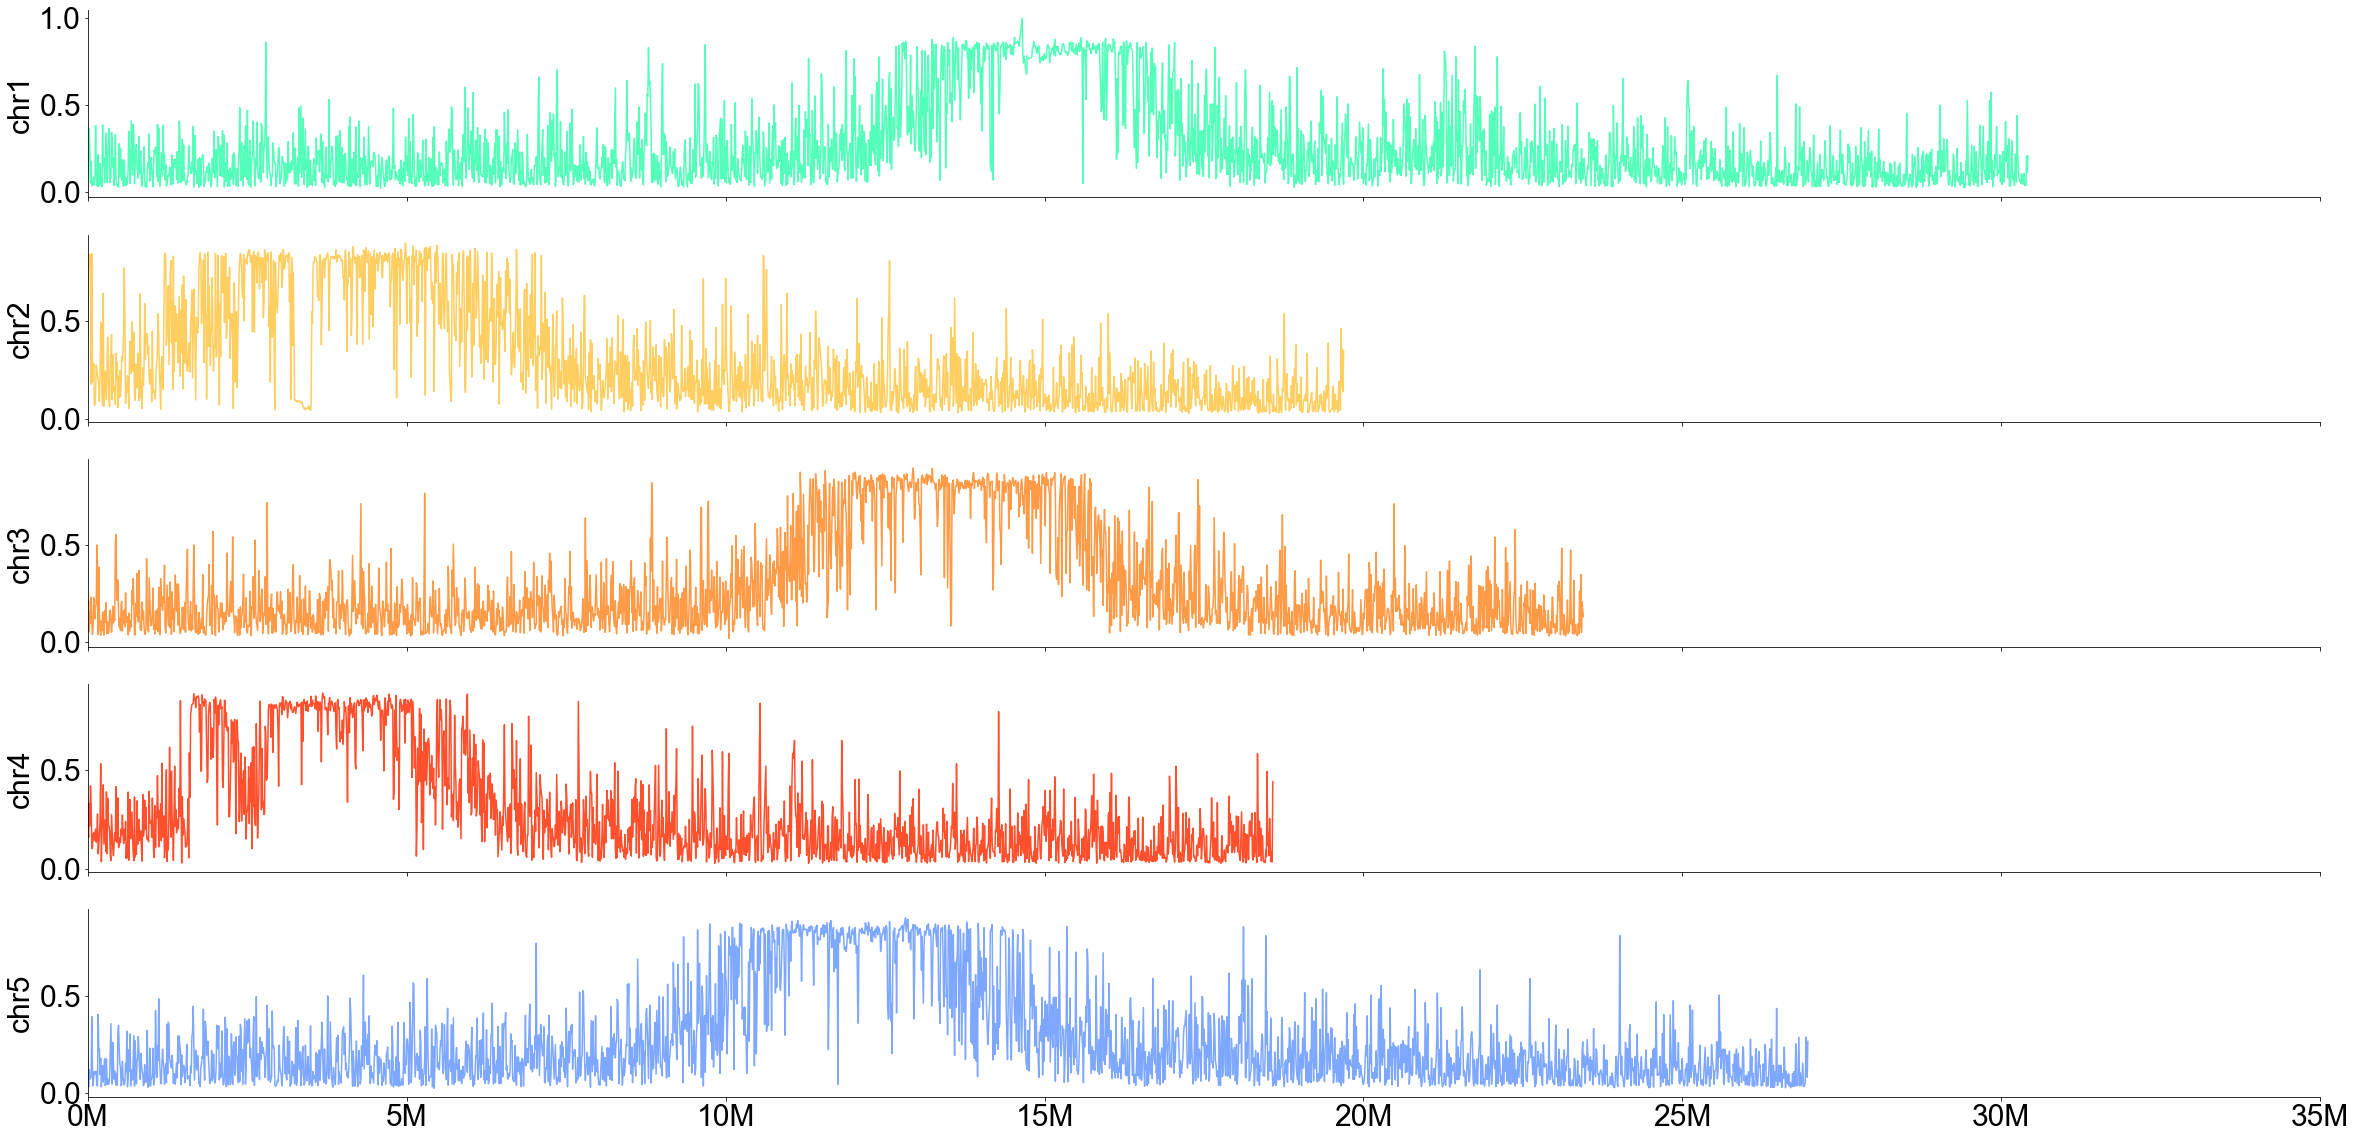

In [6]:
Long_C_CG_Rep2_10k = pd.read_csv('/public/home/lizw/task/pore_c/methylation/merge_CG_10000_level_size_detial.csv',converters={'chrom':str})
Long_C_CG_Rep2_10k['start']  = [int(x[0][1:]) for x in Long_C_CG_Rep2_10k['interval'].str.split(',')]
Long_C_CG_Rep2_10k['end'] = [int(x[1][:-1]) for x in Long_C_CG_Rep2_10k['interval'].str.split(',')]

geno_file = '~/data/IMPORTANT_genome/arabidopsis/tair10/all_chr.bed'
geno_bed = pd.read_table(geno_file,header=None,names=['chrom','chr_start','chr_end'])
fig, ax = plt.subplots(nrows=5,ncols=1,figsize=(40,20),sharex=True)
colorlist = ['#54FFBA', '#FFCE61', '#FF9A47', '#FF502E', '#7EA8FF']
for i in ['1','2','3','4','5']:
    ax_chr = ax[int(i)-1]
    Long_C_CG_Rep2_10k.query('chrom == @i').plot(x='start',y='met_level',ax=ax_chr,legend=False,color=colorlist[int(i)-1])
    sns.despine(ax = ax_chr)
    ax_chr.set_ylabel(f'chr{i}')

max_chr = geno_bed['chr_end'].max()
binsize = 5_000_000
ax[4].set_xlim(0,max_chr)
ax[4].set_xlabel('')
tick_loc = np.arange(0,max_chr+binsize,binsize)
tick_label=[f'{x}M' for x in list(np.arange(0,max_chr+binsize,binsize)//1_000_000)]
plt.xticks(tick_loc,tick_label)
plt.savefig('/public/home/lizw/task/pore_c/methylation/CG_geno_distribution.png',format='png',dpi=300,bbox_inches='tight')